# **First Order Gradient Descent**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Estimated Lipschitz constant L: 57558.30057970391
Recommended step size (alpha): 1.737368876301775e-05


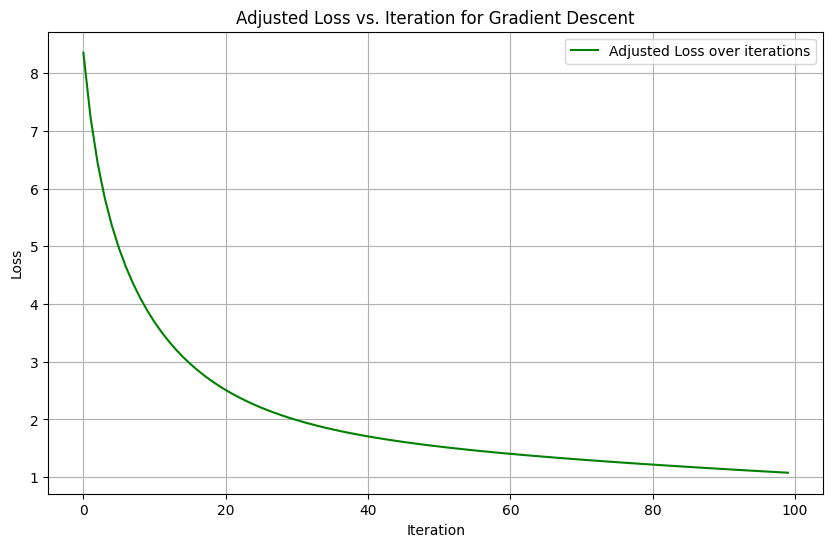

Final approximation of U after 100 iterations:
[[ 4.37834888e-03 -7.12809723e-06 -1.18406923e-03 -2.72612910e-04
   8.01125811e-03]
 [ 3.62321352e-04 -1.30959847e-03 -8.55565115e-03 -2.14782448e-03
  -9.86713160e-04]
 [-7.00213743e-03 -2.86491628e-03  1.53119744e-04  2.42611133e-04
   3.33525064e-03]
 [ 3.30222008e-03 -2.99374177e-03  2.71720796e-03 -2.23909832e-03
   2.86489961e-03]
 [ 3.69209277e-04  3.64515651e-03  2.08342710e-03 -6.42053050e-03
  -2.61118082e-03]]


In [2]:
A = np.array([
    [7, 32, -83, 47, -52],
    [95, -41, -13, -197, 65],
    [-34, -64, 31, 36, -14],
    [4, -66, -57, -66, -100],
    [112, -23, 54, -28, 18]
])

I = np.eye(5)

# Initial approximation of U (initialized to zero matrix here)
U = np.zeros((5, 5))

#step size (learning rate)
alpha_adjusted = 1e-6

iterations = 100

def compute_loss(U, A, I):
    return np.linalg.norm(A @ U - I, 'fro')**2 + np.linalg.norm(U @ A - I, 'fro')**2


def compute_gradient(U, A):
    return 4 * (A.T @ (A @ U) - A.T)


U_samples = []

# Array to store adjusted loss values
adjusted_loss_values = []

# Adjusted gradient descent
for _ in range(iterations):
    gradient = compute_gradient(U, A)
    U = U - alpha_adjusted * gradient
    loss = compute_loss(U, A, I)
    adjusted_loss_values.append(loss)
    U_samples.append(U.copy())

# Estimating Lipschitz constant from collected U samples
L_estimates = []

# Select random pairs to estimate L
np.random.seed(0)  # For reproducibility
sample_indices = np.random.choice(range(len(U_samples)), size=(20, 2), replace=False)

for idx_pair in sample_indices:
    U_i = U_samples[idx_pair[0]]
    U_j = U_samples[idx_pair[1]]
    grad_U_i = compute_gradient(U_i, A)
    grad_U_j = compute_gradient(U_j, A)

    grad_diff_norm = np.linalg.norm(grad_U_i - grad_U_j)
    U_diff_norm = np.linalg.norm(U_i - U_j)

    if U_diff_norm != 0:
        L_estimated = grad_diff_norm / U_diff_norm
        L_estimates.append(L_estimated)

L = max(L_estimates)
print("Estimated Lipschitz constant L:", L)

# Recommended step size (alpha)
alpha_optimal = 1 / L
print("Recommended step size (alpha):", alpha_optimal)

plt.figure(figsize=(10, 6))
plt.plot(adjusted_loss_values, label='Adjusted Loss over iterations', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Adjusted Loss vs. Iteration for Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

# Output the final approximation of U
print("Final approximation of U after 100 iterations:")
print(U)


# **Zeroth Order Gradient Descent**

In [3]:
A = np.array([
    [7, 32, -83, 47, -52],
    [95, -41, -13, -197, 65],
    [-34, -64, 31, 36, -14],
    [4, -66, -57, -66, -100],
    [112, -23, 54, -28, 18]
])

I = np.eye(5)

mu = 1e-3
m = 100

c=30
alpha_adjusted = 1e-6  # Original step size from previous part
dimension = np.prod(A.shape)  # Problem dimension
alpha_zeroth_order = c*(alpha_adjusted/25)


iterations = 100

def compute_loss(U, A, I):
    return np.linalg.norm(A @ U - I, 'fro')**2 + np.linalg.norm(U @ A - I, 'fro')**2


def compute_zeroth_order_gradient(U, A, I, mu, m):
    gradient_approx = np.zeros(U.shape)
    for _ in range(m):
        G = np.random.randn(*U.shape)  # Random matrix G with standard normal entries
        gradient_approx += (compute_loss(U + mu * G, A, I) - compute_loss(U, A, I)) / mu * G
    gradient_approx /= m
    return gradient_approx

U_zeroth_order = np.zeros((5, 5))

zeroth_order_loss_values = []

# Perform zeroth-order gradient descent
for _ in range(iterations):
    gradient = compute_zeroth_order_gradient(U_zeroth_order, A, I, mu, m)
    U_zeroth_order = U_zeroth_order - alpha_zeroth_order * gradient
    loss = compute_loss(U_zeroth_order, A, I)
    zeroth_order_loss_values.append(loss)


# plt.figure(figsize=(10, 6))
# plt.plot(zeroth_order_loss_values, label='Zeroth-Order Loss over iterations', color='red')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Zeroth-Order Gradient Descent Loss vs. Iteration')
# plt.legend()
# plt.grid(True)
# plt.show()


print("Final approximation of U using zeroth-order gradient descent:")
print(U_zeroth_order)


Final approximation of U using zeroth-order gradient descent:
[[ 4.75729527e-03 -3.66505181e-04 -1.11334786e-03 -2.06091408e-04
   8.00821937e-03]
 [-3.37489115e-04 -1.58775082e-03 -9.43566184e-03 -2.51876490e-03
  -9.11755400e-04]
 [-7.51778502e-03 -2.67833040e-03  4.84007614e-06  2.41881471e-04
   3.59823291e-03]
 [ 3.19945313e-03 -2.66323727e-03  3.71262892e-03 -1.83085032e-03
   2.78047239e-03]
 [-3.04866504e-04  3.54645630e-03  3.19041274e-03 -6.10635474e-03
  -3.28285336e-03]]


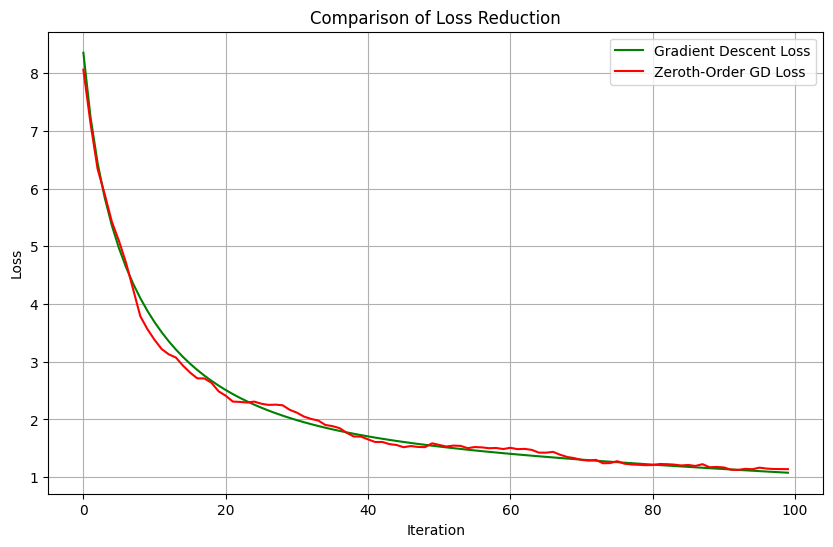

In [4]:
plt.figure(figsize=(10, 6))

# Plot for gradient descent from previous part
plt.plot(adjusted_loss_values, label='Gradient Descent Loss', color='green')

# Plot for zeroth-order gradient descent from this part
plt.plot(zeroth_order_loss_values, label='Zeroth-Order GD Loss', color='red')


plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Comparison of Loss Reduction')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
